<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [15]:
import pandas as pd
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [16]:
school_fp = '/Users/ryandunlap/Desktop/DSI-SF-2-rddunlap23/datasets/San_Francisco/schools/sf_schools.csv'
crime_fp = '/Users/ryandunlap/Desktop/DSI-SF-2-rddunlap23/datasets/San_Francisco/sf_crime/sfpd_incidents_from2003.csv'
df = pd.read_csv(crime_fp)
mapdata = np.loadtxt("/Users/ryandunlap/Desktop/DSI-SF-2-rddunlap23/datasets/San_Francisco/sf_map_copyright_openstreetmap_contributors.txt")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945294 entries, 0 to 1945293
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 192.9+ MB


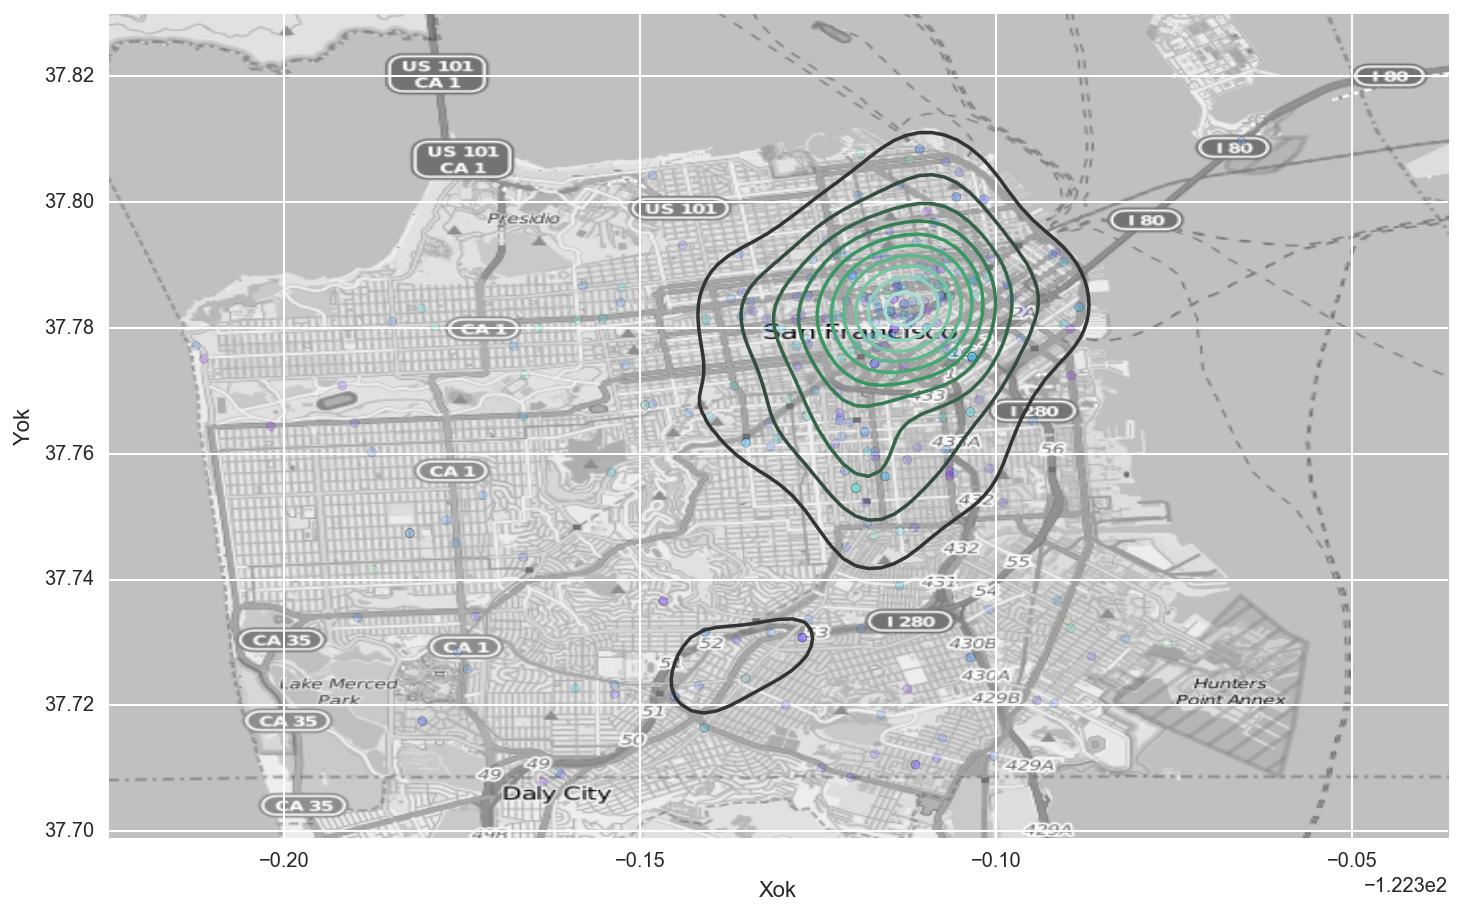

In [71]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("/Users/ryandunlap/Desktop/DSI-SF-2-rddunlap23/datasets/San_Francisco/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

train = df

#Get rid of the bad lat/longs
train['Xok'] = train[train.X<-121].X
train['Yok'] = train[train.Y<40].Y
train = train.dropna()

trainP = train[train.Category == 'PROSTITUTION'] #Grab the prostitution crimes
train = train[1:300] #Can't use all the data and complete within 600 sec :(


colors = cm.rainbow(np.linspace(0, 1, df.Category.unique().size+1))
color_dic = {x:y for x,y in zip(df.Category.unique(),colors)}
df['colors'] = df.Category.map(color_dic)

plt.figure(figsize=(12,12*asp))
sns.kdeplot(train.Xok, train.Yok, clip=clipsize, aspect=1/asp)

plt.scatter(train.Xok, train.Yok,data=train[train['Category']=='PROSTITUTION'],c=df.colors,alpha=0.2)
plt.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

plt.show()

In [21]:
#Convert dates to datetime type
df.Time=pd.to_datetime(df.Time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945294 entries, 0 to 1945293
Data columns (total 15 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          datetime64[ns]
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
Xok           float64
Yok           float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 222.6+ MB


In [69]:
df.groupby(['Category']).size()

Category
ARSON                            3395
ASSAULT                        170313
BAD CHECKS                        872
BRIBERY                           702
BURGLARY                        81024
DISORDERLY CONDUCT               9211
DRIVING UNDER THE INFLUENCE      5093
DRUG/NARCOTIC                  113099
DRUNKENNESS                      9207
EMBEZZLEMENT                     2648
EXTORTION                         633
FAMILY OFFENSES                  1109
FORGERY/COUNTERFEITING          22055
FRAUD                           36970
GAMBLING                          318
KIDNAPPING                       4946
LARCENY/THEFT                  400224
LIQUOR LAWS                      3930
LOITERING                        2372
MISSING PERSON                  57243
NON-CRIMINAL                   207987
OTHER OFFENSES                 276609
PORNOGRAPHY/OBSCENE MAT            48
PROSTITUTION                    15839
RECOVERED VEHICLE                7690
ROBBERY                         49960
RUN

https://www.kaggle.com/swbevan/sf-crime/a-history-of-crime-python/output

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [22]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Xok,Yok
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,2016-08-15 16:42:00,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010,-122.406971,37.772527
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,2016-08-15 08:55:00,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000,-122.389518,37.772468
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,2016-08-15 00:41:00,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000,-122.412470,37.722659
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,2016-08-15 21:00:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074,-122.414318,37.779944
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,2016-08-15 21:00:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200,-122.414318,37.779944


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?